## Learning CV2
- Henrique Pereira
- 12/01/2018
- Ref: https://media.readthedocs.org/pdf/opencv-python-tutroals/latest/opencv-python-tutroals.pdf

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Moments
- pg. 87

Image moments help you to calculate some features like center of mass of the object, area of the object etc. Check out the wikipedia page on Image Moments. The function cv2.moments() gives a dictionary of all moment values calculated. See below:

In [10]:
import cv2
import numpy as np

pathname = 'fig/frames/'
listfiles = np.sort(os.listdir(pathname))
filename = listfiles[100]

img = cv2.imread(pathname+filename,0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy, offset = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
print M

{'mu02': 990675.0, 'mu03': 0.0, 'm11': 0.0, 'nu02': 0.011755628177196805, 'm12': 0.0, 'mu21': 0.0, 'mu20': 0.0, 'nu20': 0.0, 'm30': 0.0, 'nu21': 0.0, 'mu11': 0.0, 'mu12': 0.0, 'nu11': 0.0, 'nu12': 0.0, 'm02': 32671529730.0, 'm03': 61638578652420.0, 'm00': 9180.0, 'm01': 17318070.0, 'mu30': 0.0, 'nu30': 0.0, 'nu03': 0.0, 'm10': 0.0, 'm20': 0.0, 'm21': 0.0}


From this moments, you can extract useful data like area, centroid etc. Centroid is given by the relations, C x =
M 01 and C y = M. This can be done as follows:

In [11]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [23]:
cxx = []
cyy = []

for cnt in contours:
    M = cv2.moments(cnt)
#     print M
    if M['m00'] <> 0:
        
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])

        cxx.append(cx)
        cyy.append(cy)

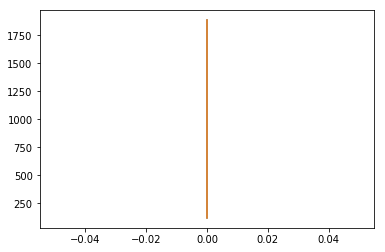

In [27]:
plt.plot(cxx, cyy)
plt.show()

## Template Matching with Multiple Objects
- pg. 135

In the previous section, we searched image for Messi’s face, which occurs only once in the image. Suppose you are
searching for an object which has multiple occurances, cv2.minMaxLoc() won’t give you all the locations. In that
case, we will use thresholding. So in this example, we will use a screenshot of the famous game Mario and we will
find the coins in it.

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

pathname = 'fig/frames/'
listfiles = np.sort(os.listdir(pathname))
filename = listfiles[100]

img_rgb = cv2.imread(pathname + filename)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('fig/ball_video_01.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('res.png',img_rgb)

True

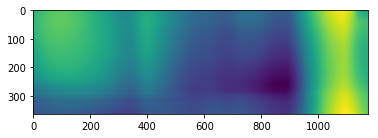

In [33]:
plt.imshow(res)
plt.show()

In [5]:
a=cv2.findContours(thresh, 1, 2)

In [9]:
cv2.findContours?

In [ ]:
pathname = os.environ['HOME'] + '/Dropbox/Random_Drift/data/'
filename = 'frame.jpg'

In [ ]:
# Load an color image in grayscale

# cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default
# flag.
# cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
# cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel
# Note: Instead of these three flags, you can simply pass integers 1, 0 or -1 respectively.

img = cv2.imread(pathname + filename,0)
img

In [ ]:
# cv2.waitKey() is a keyboard binding function. Its argument is the time in milliseconds. The function waits for
# specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If 0 is passed,
# it waits indefinitely for a key stroke. It can also be set to detect specific key strokes like, if key a is pressed etc which
# we will discuss below.

# cv2.destroyAllWindows() simply destroys all the windows we created. If you want to destroy any specific window,
# use the function cv2.destroyWindow() where you pass the exact window name as the argument

# Note: There is a special case where you can already create a window and load image to it later. In that case, you can
# specify whether window is resizable or not. It is done with the function cv2.namedWindow(). By default, the flag is
# cv2.WINDOW_AUTOSIZE. But if you specify flag to be cv2.WINDOW_NORMAL, you can resize window. It will be
# helpful when image is too large in dimension and adding track bar to windows.

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Write and image  

In [ ]:
cv2.imwrite('teste_opencv1.png',img)

## Plot with matplotlib

In [ ]:
# plot with matplolib

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [ ]:
# Below program loads an image in grayscale, displays it, save the image if you press ‘s’ and exit, or simply exit without
# saving if you press ESC key.

# import numpy as np
# import cv2

img = cv2.imread(pathname + filename,0)

cv2.imshow('image',img)
k = cv2.waitKey(0) & 0xFF

if k == 27:
    
    # wait for ESC key to exit
    cv2.destroyAllWindows()

elif k == ord('s'): # wait for 's' key to save and exit

    cv2.imwrite('messigray2.png',img)
    cv2.destroyAllWindows()

## Video

In [ ]:
import os
import cv2

In [ ]:
pathname = os.environ['HOME'] + '/Dropbox/Random_Drift/data/DERIVA_RANDOMICA/VIDEO/CAM1/T100/'
filename = 'T100_010100_CAM1.avi'

In [ ]:
cap = cv2.VideoCapture(pathname + filename)

while(cap.isOpened()):
    
#     print cap.isOpened()

    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
# access some of the features of this video using cap.get(propId)

cap = cv2.VideoCapture(pathname + filename)

print cap.isOpened()

# these values can be modified using cap.set(propId, value)

# frame width
print cap.get(3)

# frame height
print cap.get(4)


## Playing video from a  file

In [ ]:
import numpy as np
import cv2

pathname = '/home/hp/Dropbox/Random_Drift/data/DERIVA_RANDOMICA/VIDEO/CAM1/T100/T100_010100_CAM1.avi'

cap = cv2.VideoCapture(pathname)

while(cap.isOpened()):

    ret, frame = cap.read()

# ret
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('frame',gray)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()

cv2.destroyAllWindows()


In [ ]:
# teste tracking

import numpy as np
import cv2

pathname = '/home/hp/Dropbox/Random_Drift/data/DERIVA_RANDOMICA/VIDEO/CAM1/T100/T100_010100_CAM1.avi'

cap = cv2.VideoCapture(pathname)

# take first frame of the video
ret,frame = cap.read()


# setup initial location of window
r,h,c,w = 250,90,400,125 # simply hardcoded the values
track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
	ret ,frame = cap.read()
	if ret == True:
		hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
		dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
		# apply meanshift to get the new location
		ret, track_window = cv2.meanShift(dst, track_window, term_crit)
		# Draw it on image
		x,y,w,h = track_window
		img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
		cv2.imshow('img2',img2)
		k = cv2.waitKey(60) & 0xff
		if k == 27:
			break
		else:
			cv2.imwrite(chr(k)+".jpg",img2)
	else:
		break
cv2.destroyAllWindows()
cap.release()

## Saving a video

## Drawing Functions in OpenCV

In [ ]:
# Functions: cv2.line(), cv2.circle() , cv2.rectangle(), cv2.ellipse(), cv2.putText()

# In all the above functions, you will see some common arguments as given below:
# • img : The image where you want to draw the shapes
# • color : Color of the shape. for BGR, pass it as a tuple, eg: (255,0,0) for blue. For grayscale, just pass the
# scalar value.
# • thickness : Thickness of the line or circle etc. If -1 is passed for closed figures like circles, it will fill the shape.
# default thickness = 1
# • lineType : Type of line, whether 8-connected, anti-aliased line etc. By default, it is 8-connected. cv2.LINE_AA
# gives anti-aliased line which looks great for curves.

In [ ]:
# %matplotlib inline
# %matplotlib qt5

In [ ]:
# Create a black image

import numpy as np
import cv2

img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

cv2.imshow('image1',img)

# Drawing Rectangle
# To draw a rectangle, you need top-left corner and bottom-right corner of rectangle. This time we will draw a green
# rectangle at the top-right corner of image.

img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

cv2.imshow('image2',img)

# Drawing Circle
# To draw a circle, you need its center coordinates and radius. We will draw a circle inside the rectangle drawn above.

img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

cv2.imshow('image3',img)

# Drawing Ellipse
# To draw the ellipse, we need to pass several arguments. One argument is the center location (x,y). Next argument is
# axes lengths (major axis length, minor axis length). angle is the angle of rotation of ellipse in anti-clockwise direc-
# tion. startAngle and endAngle denotes the starting and ending of ellipse arc measured in clockwise direction
# from major axis. i.e. giving values 0 and 360 gives the full ellipse. For more details, check the documentation of
# cv2.ellipse(). Below example draws a half ellipse at the center of the image.

img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

cv2.imshow('image4',img)

# Drawing Polygon
# To draw a polygon, first you need coordinates of vertices. Make those points into an array of shape ROWSx1x2 where
# ROWS are number of vertices and it should be of type int32. Here we draw a small polygon of with four vertices in
# yellow color.
# Note: If third argument is False, you will get a polylines joining all the points, not a closed shape.
# Note: cv2.polylines() can be used to draw multiple lines. Just create a list of all the lines you want to draw
# and pass it to the function. All lines will be drawn individually. It is more better and faster way to draw a group of
# lines than calling cv2.line() for each line.

pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))

img = cv2.polylines(img,[pts],True,(0,255,255))

cv2.imshow('image5',img)

# Adding Text to Images:
# To put texts in images, you need specify following things.
# • Text data that you want to write
# • Position coordinates of where you want put it (i.e. bottom-left corner where data starts).
# • Font type (Check cv2.putText() docs for supported fonts)
# • Font Scale (specifies the size of font)
# • regular things like color, thickness, lineType etc. For better look, lineType = cv2.LINE_AA is
# recommended.
# We will write OpenCV on our image in white color.

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

cv2.imshow('image6',img)


## Mouse as a Paint-Brush
Goal

• Learn to handle mouse events in OpenCV

• You will learn these functions : cv2.setMouseCallback()

In [ ]:
# Simple Demo
# Here, we create a simple application which draws a circle on an image wherever we double-click on it.
# First we create a mouse callback function which is executed when a mouse event take place. Mouse event can be
# anything related to mouse like left-button down, left-button up, left-button double-click etc. It gives us the coordinates
# (x,y) for every mouse event. With this event and location, we can do whatever we like. To list all available events
# available, run the following code in Python terminal:

events = [i for i in dir(cv2) if 'EVENT' in i]
print events


In [ ]:
# Creating mouse callback function has a specific format which is same everywhere. It differs only in what the function
# does. So our mouse callback function does one thing, it draws a circle where we double-click. So see the code below.
# Code is self-explanatory from comments :

import cv2
import numpy as np

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)

# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import os

# pathname = os.environ['HOME'] + '/Dropbox/Random_Drift/data/'
# filename = 'frame.jpg'

pathname = 'fig/frames/'
# v = cv2.VideoCapture(video_path)
# ret, cap = v.read()

for filename in np.sort(os.listdir(pathname))[50:150]:

    img = cv2.imread(pathname + filename,0)

    img = cv2.medianBlur(img,5)
    
    cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

    circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1.9,20,
                               param1=50,param2=30,minRadius=5,maxRadius=15)

    circles = np.uint16(np.around(circles))

    for i in circles[0,:]:

        # draw the outer circle
        cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)

        # draw the center of the circle
        cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
        
    cv2.imwrite('fig/circles/circles_%s' %filename, cimg)

#     cv2.imshow('fig/circle_detection_%s' %filename, cimg)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
